# Modelling Target Audience
* The objective of this project is to build a model using the bank's previous marketing campaign data, to improve the cost efficiency and conversion ratio of the next marketing campaign. Precision is a suitable metric to improve the cost efficiency, and recall is a suitable metric to improve the conversion ratio. Because we are optimizing for both of these metrics, our metric used to compare model performances will be the f1-score, which is the average between precision and recall.

## 1. All necessary imports

In [3]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from tqdm import tqdm

# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, roc_auc_score
# from sklearn.model_selection import StratifiedKFold

# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier


# Importing the dataset
df = pd.read_csv('../Capstone 2/2_Bank_Marketing_Dataset2.csv',sep=';')

p = np.random.permutation(len(df))
df = df.iloc[p]

# Setting display options
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
sns.set_theme(style="whitegrid")

## 2. Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 19442 to 23813
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-n

* We can see from the .info() method that the dataset has a good mix of datatypes. We will have to dummy/one-hot-encode these text-based columns later before we model. We may also need to bin some of the continuous columns for simplicity sake.

In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,41188.0,NaN,NaN,NaN,40.02406,10.42125,17.0,32.0,38.0,47.0,98.0
job,41188,12,admin.,10422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,41188,4,married,24928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,41188,8,university.degree,12168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,41188,3,no,32588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,41188,3,yes,21576,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,41188,3,no,33950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,41188,2,cellular,26144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,41188,10,may,13769,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,41188,5,thu,8623,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* From the .describe() method we can see that some columns such as 'pdays' and 'previous' mostly consist of the same value. Additionally, from the data feature dictionary, it seems that these two columns may be highly correlated. The value 999 in column 'pdays' is an assigned null value, and so this column is primarily made of null values. 

* We will not remove or edit these two columns yet until we see their predictive power as decided by our models' assigned importance to them.

In [6]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
19442,42,technician,married,professional.course,no,yes,no,cellular,aug,thu,108,2,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,no
18243,53,technician,married,professional.course,unknown,no,no,telephone,jul,wed,191,3,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
38986,30,student,single,unknown,no,no,no,cellular,dec,mon,69,1,999,1,failure,-3.0,92.713,-33.0,0.717,5023.5,no
23890,41,technician,married,high.school,no,no,yes,cellular,aug,fri,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
23738,34,technician,married,professional.course,no,yes,no,telephone,aug,thu,51,2,999,0,nonexistent,1.4,93.444,-36.1,4.962,5228.1,no
39869,60,housemaid,married,basic.4y,no,yes,no,cellular,jun,tue,700,3,999,1,failure,-1.7,94.055,-39.8,0.723,4991.6,yes
10896,36,admin.,married,high.school,no,yes,no,telephone,jun,wed,159,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
30809,33,admin.,single,high.school,no,no,no,cellular,may,tue,151,1,999,0,nonexistent,-1.8,92.893,-46.2,1.344,5099.1,no
38183,71,retired,married,basic.9y,no,no,no,cellular,oct,fri,131,2,999,0,nonexistent,-3.4,92.431,-26.9,0.752,5017.5,no
15584,33,technician,married,professional.course,no,no,yes,cellular,jul,fri,414,6,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,no


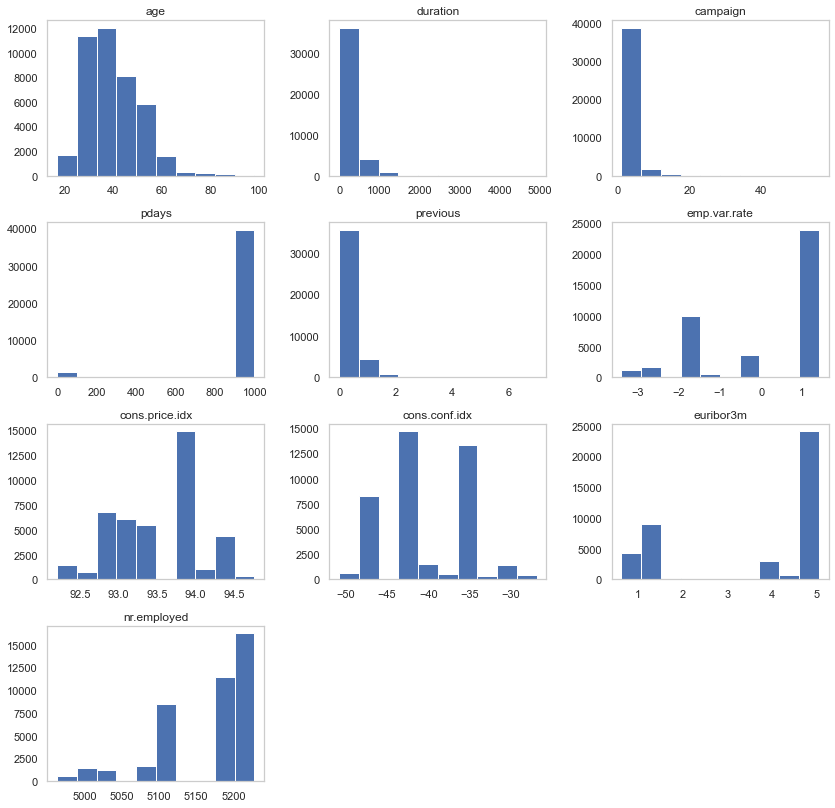

In [7]:
# Histogram of DataFrame.

ax = df.hist(grid=False, figsize=(14,14), zorder=2)

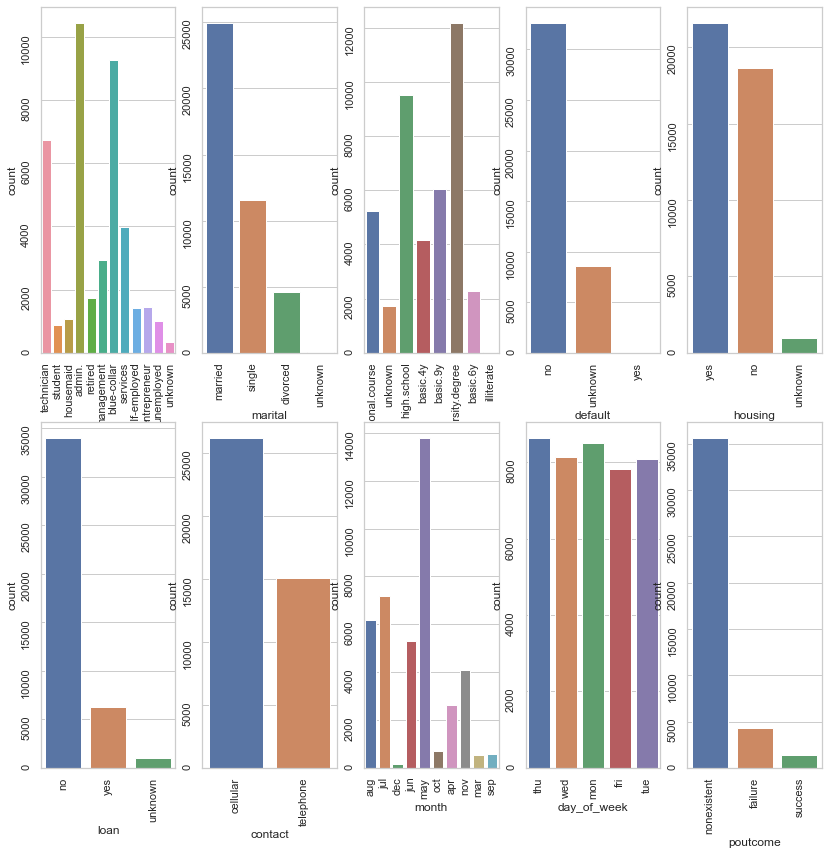

In [8]:
df_cat_cols = df.select_dtypes(include='object').columns

fig = plt.figure(figsize=(14,14))
ax1 = fig.add_subplot(251)
sns.countplot(ax=ax1, data=df, x=df_cat_cols[0])
ax2 = fig.add_subplot(252)
sns.countplot(ax=ax2, data=df, x=df_cat_cols[1])
ax3 = fig.add_subplot(253)
sns.countplot(ax=ax3, data=df, x=df_cat_cols[2])
ax4 = fig.add_subplot(254)
sns.countplot(ax=ax4, data=df, x=df_cat_cols[3])
ax5 = fig.add_subplot(255)
sns.countplot(ax=ax5, data=df, x=df_cat_cols[4])
ax6 = fig.add_subplot(256)
sns.countplot(ax=ax6, data=df, x=df_cat_cols[5])
ax7 = fig.add_subplot(257)
sns.countplot(ax=ax7, data=df, x=df_cat_cols[6])
ax8 = fig.add_subplot(258)
sns.countplot(ax=ax8, data=df, x=df_cat_cols[7])
ax9 = fig.add_subplot(259)
sns.countplot(ax=ax9, data=df, x=df_cat_cols[8])
ax10 = fig.add_subplot(2,5,10)
sns.countplot(ax=ax10, data=df, x=df_cat_cols[9])

ax1.tick_params(rotation=90)
ax2.tick_params(rotation=90)
ax3.tick_params(rotation=90)
ax4.tick_params(rotation=90)
ax5.tick_params(rotation=90)
ax6.tick_params(rotation=90)
ax7.tick_params(rotation=90)
ax8.tick_params(rotation=90)
ax9.tick_params(rotation=90)
ax10.tick_params(rotation=90)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


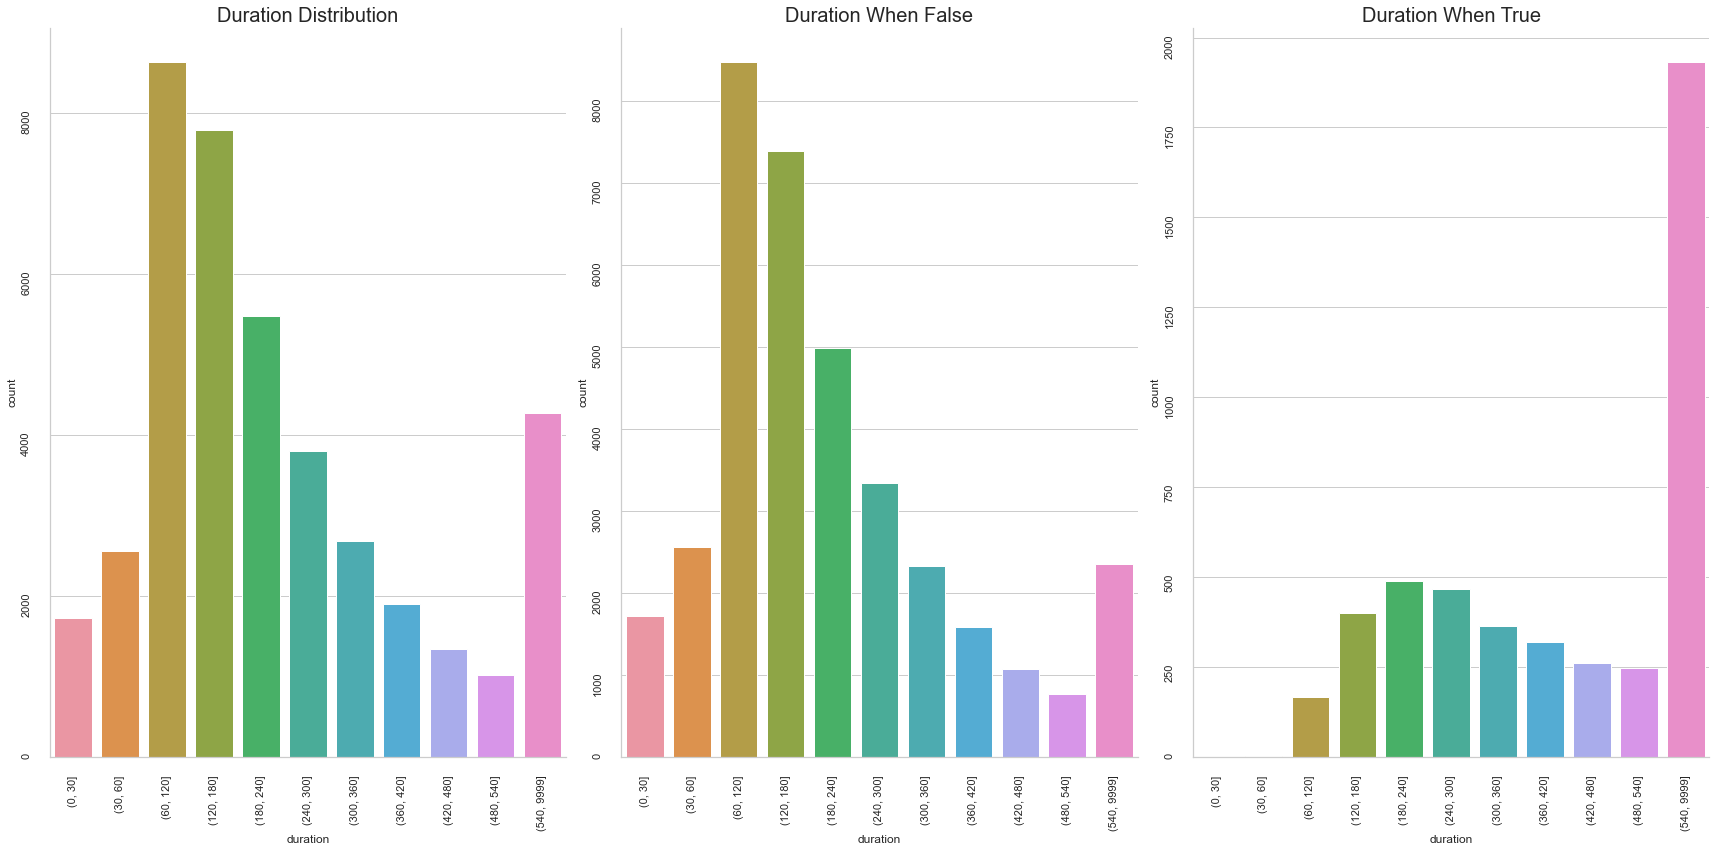

In [19]:
plt.figure(figsize=(24,12))
ax1 = plt.subplot(1, 3, 1)

bins=[0,30,60,120,180,240,300,360,420,480,540,9999]
labels=['under30', '30_60','60_120','120_180','180_240','240_300','300_360','360_420','420_480','480_540','over540']
duration_bin = pd.cut(df['duration'],bins)
sns.countplot(duration_bin,ax=ax1)
ax1.tick_params(rotation=90,size=15)
ax1.set_title('Duration Distribution',size=20)

ax2 = plt.subplot(1, 3, 2)
false_duration_bin = pd.cut(df['duration'][df['y'] == 0],bins)
sns.countplot(false_duration_bin,ax=ax2)
ax2.tick_params(rotation=90,size=15)
ax2.set_title('Duration When False',size=20)


ax3 = plt.subplot(1, 3, 3)
true_duration_bin = pd.cut(df['duration'][df['y'] == 1],bins)
sns.countplot(true_duration_bin,ax=ax3)
ax3.tick_params(rotation=90,size=15)
ax3.set_title('Duration When True',size=20)

sns.despine()

plt.tight_layout()

In [ ]:
sns.kdeplot(df['age'])
plt.axvline(np.mean(df['age']))
plt.axvline(np.median(df['age']), color='red')

In [ ]:
# Histogram of DataFrame.

ax = df.hist(grid=False, figsize=(14,14), zorder=2)

In [ ]:
# Exploring Duration further

fig, ax1 = plt.subplots(figsize=(7,5))

color = 'tab:red'
ax1.plot(df['duration'].sort_values(),np.arange(len(df['duration'])) / float(len(df['duration'])),color=color)
ax1.set_ylabel('CDF')
ax1.set_xlabel('Duration (seconds)')
ax1.tick_params(axis='y', labelcolor=color,)


color = 'tab:blue'
ax2 = ax1.twinx()
sns.kdeplot(ax=ax2, x=df['duration'],color=color)
ax2.set_ylabel('PDF')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('CDF & PDF of Duration')
plt.xlim([-50,1000])



fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
# Exploring Duration further

sns.boxplot(x=df['duration'],sym='');
plt.xlim([-100,1000])

In [ ]:
# Exploring Campaign further

sns.boxplot(x=df['campaign']);
plt.xlim(-10,15);

In [ ]:
plt.figure(figsize=(18,12))

ax1 = plt.subplot(3,2,1)
sns.kdeplot(x=df['emp.var.rate'],ax=ax1)
ax1.xaxis.set_label_position('top');

ax2 = plt.subplot(3,2,2)
sns.kdeplot(df['cons.price.idx'],ax=ax2)
ax2.xaxis.set_label_position('top');

ax3 = plt.subplot(3,2,3)
sns.kdeplot(df['euribor3m'],ax=ax3)
ax3.xaxis.set_label_position('top');

ax4 = plt.subplot(3,2,4)
sns.kdeplot(df['nr.employed'],ax=ax4)
ax4.xaxis.set_label_position('top');


ax5 = plt.subplot(3,2,5)
sns.kdeplot(df['campaign'],ax=ax5)
ax5.set_xticks([0,2,4,6,8,10,20,50]);
ax5.set(xlim=(0, 15))
ax5.xaxis.set_label_position('top');

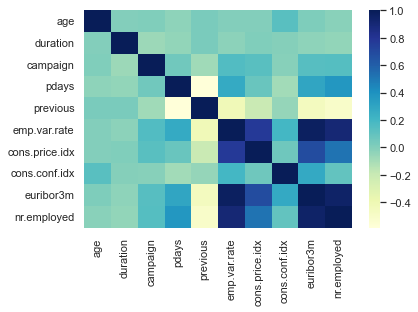

In [11]:
corr_map = sns.heatmap(df.corr(),cmap="YlGnBu")

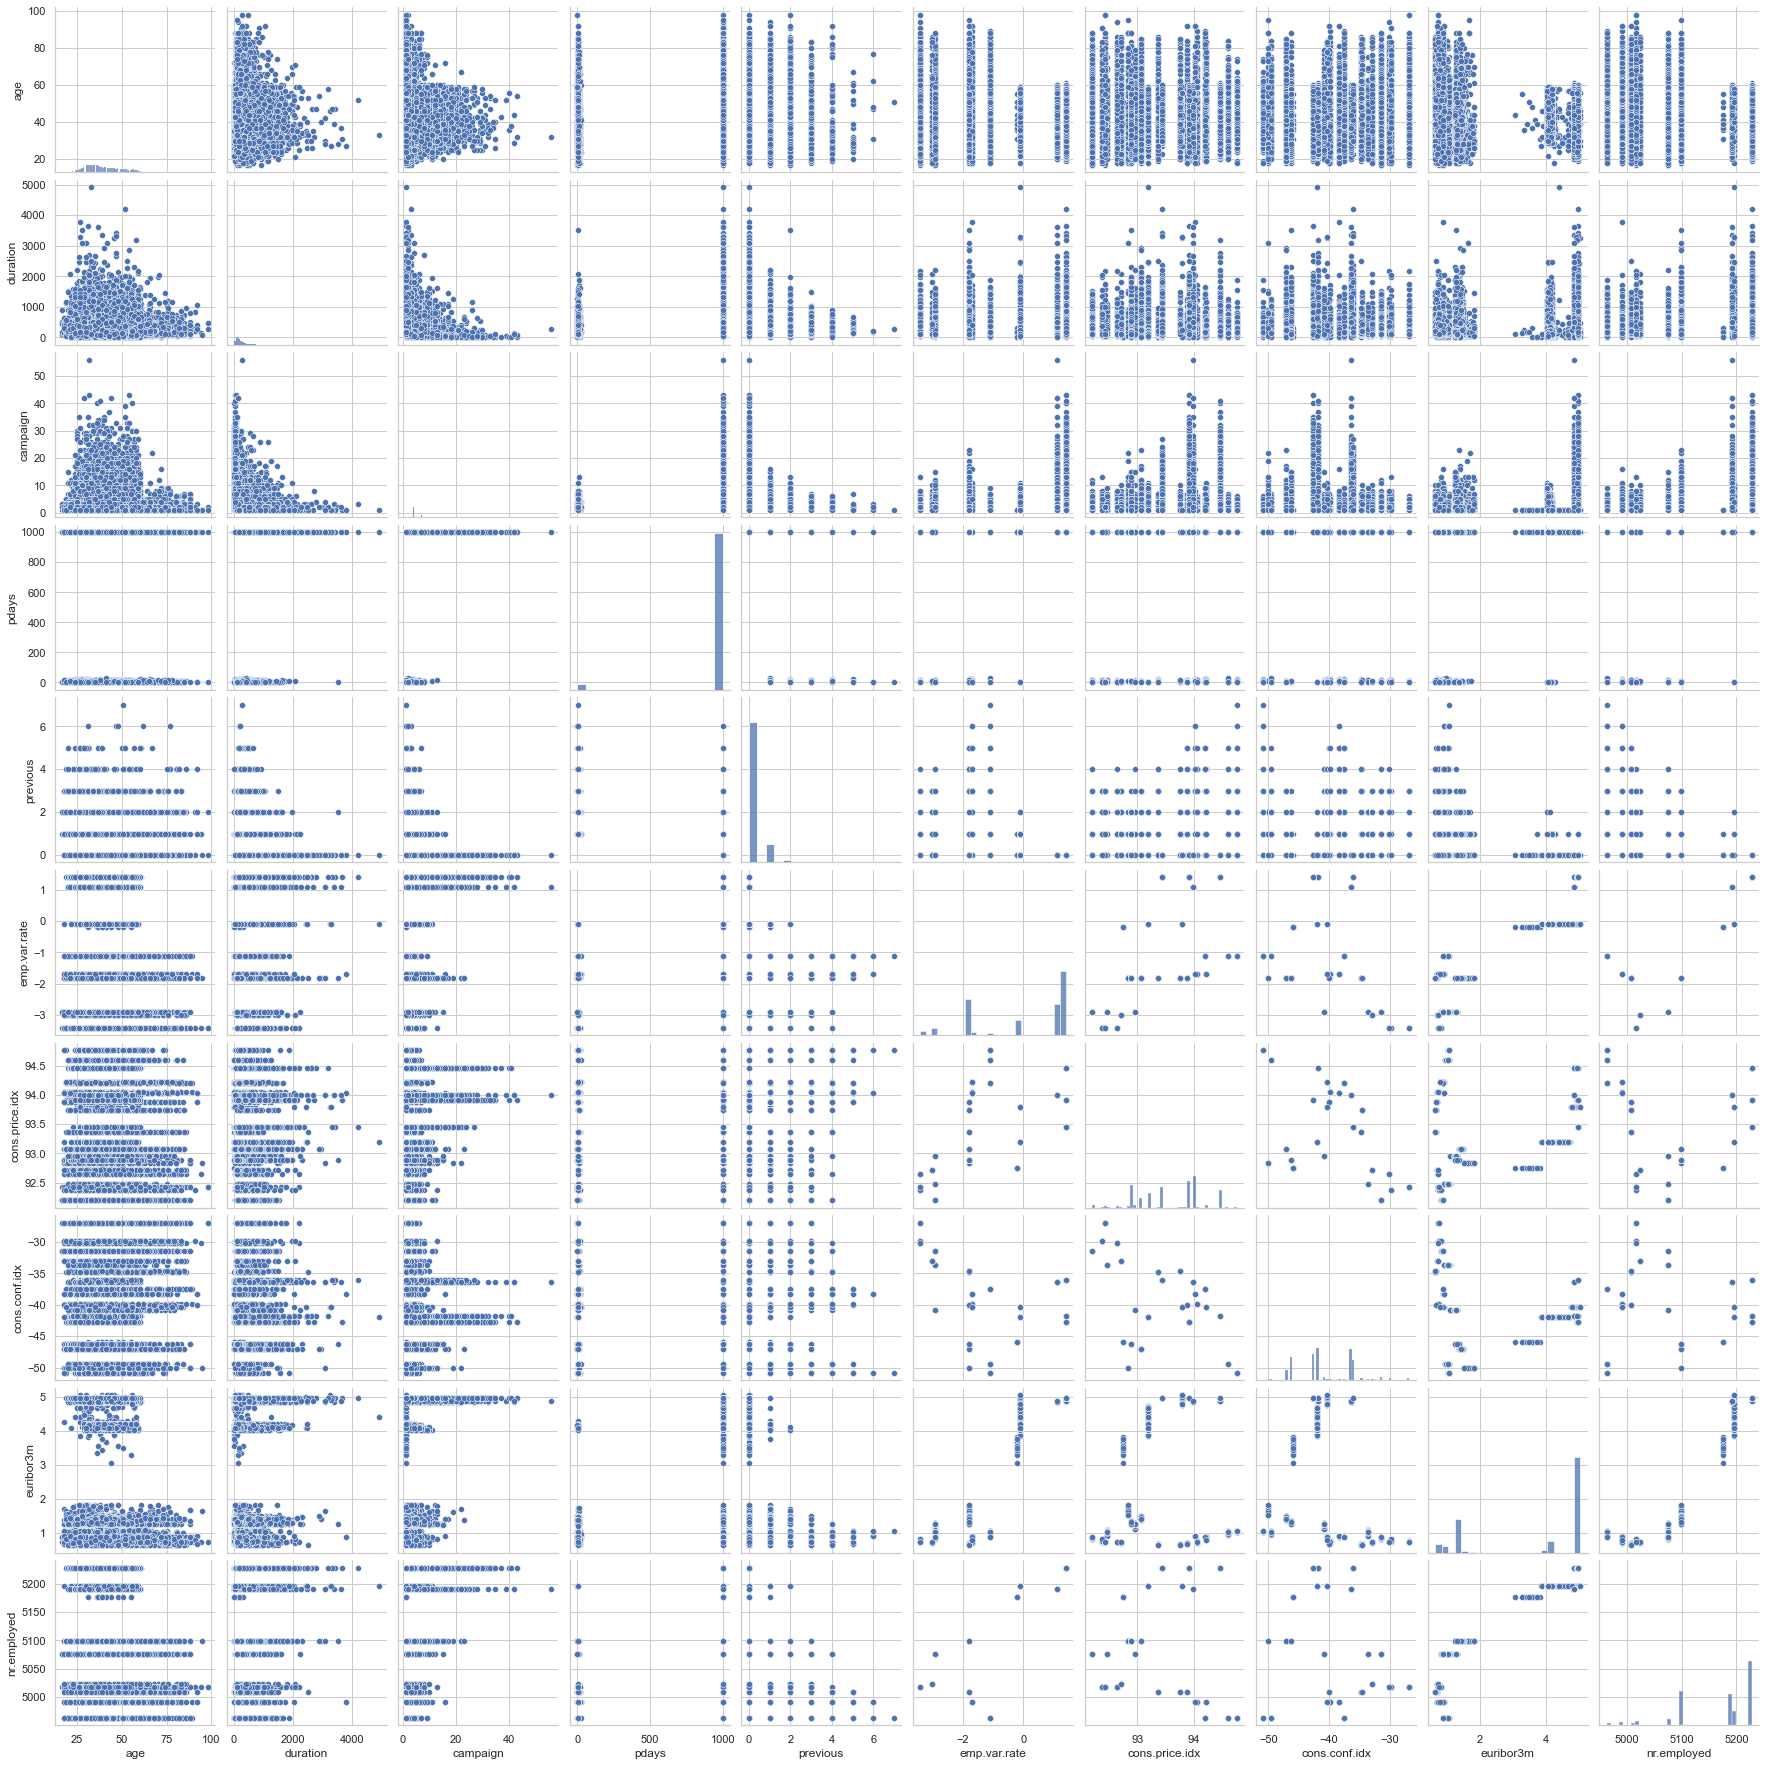

In [12]:
sns.pairplot(df);

## 3. Cleaning and Transformation

In [13]:
# Mapping target variable to numeric format

df['y'] = df['y'].replace({'no':0,'yes':1})

In [14]:
df['y'].value_counts(normalize=True)

0    0.887346
1    0.112654
Name: y, dtype: float64

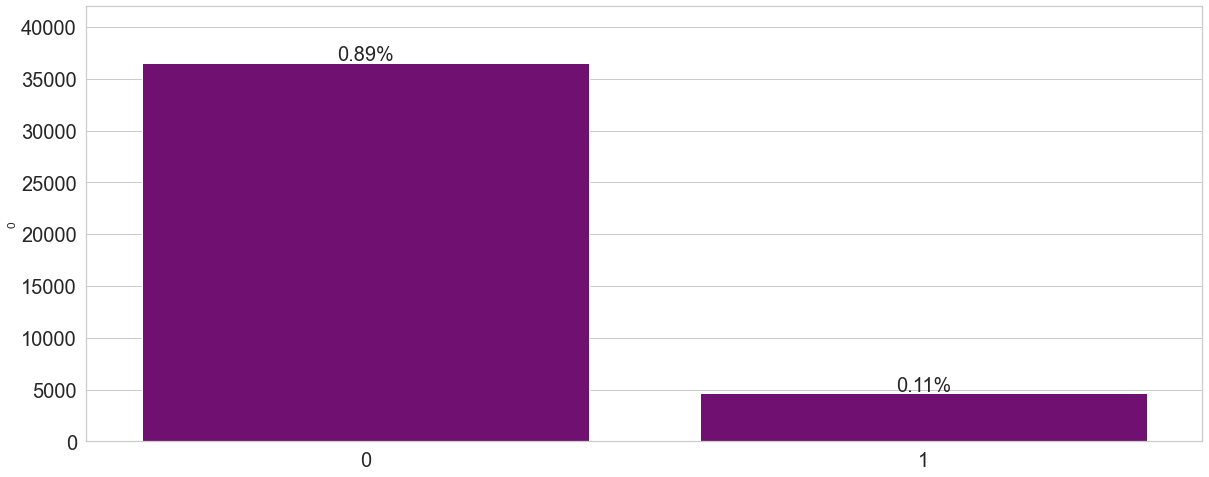

In [15]:
ydict = pd.DataFrame.from_dict({'1': [len(df[df['y'] == 1])], '0': [len(df[df['y'] == 0])]})

plt.figure(figsize=(20,8))
plots = sns.barplot(x=ydict.columns[::-1],y=ydict.iloc[0][::-1],color='purple')
plots.set_ylim([0,42000])
plt.xticks(size=20)
plt.yticks(size=20)
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height()/len(df), '.2f')+'%',
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=20, xytext=(0, 8),
                   textcoords='offset points')

In [16]:
# Transforming dataset into a machine learning algorithm friendly version

# Selecting text columns
df_text = df.select_dtypes(include='object')

# Selecting numeric columns
df_num = df.select_dtypes(include='number')

# Creation of feature matrix (X) by concatenating numeric columns with one-hot-encoded text columns
X = pd.concat([df_num,pd.get_dummies(df_text)],axis=1).drop(['y'],axis=1)

# Normalizing feature matrix using Z-score
X = (X - X.mean()) / X.std()

y = df['y']

In [17]:
print('shape: ', X.shape)
X.head(10)

shape:  (41188, 63)


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
19442,0.189607,-0.579626,-0.204906,0.195412,-0.349490,0.839050,-0.227462,0.951256,0.776449,0.845160,-0.582016,-0.53831,-0.191428,-0.162526,-0.276432,-0.208755,-0.18903,-0.326552,-0.147325,2.260119,-0.15887,-0.08987,-0.355092,0.807628,-0.62493,-0.044114,-0.335895,-0.242745,-0.414738,-0.548093,-0.020909,2.618328,-0.647524,-0.209450,0.513707,-0.513593,-0.008535,-0.908407,-0.156931,0.953389,0.461726,-0.156931,-0.422867,0.758561,-0.758561,-0.261271,2.380493,-0.066620,-0.459247,-0.385038,-0.115905,-0.708631,-0.332528,-0.133196,-0.11846,-0.484365,-0.510458,1.943305,-0.494388,-0.496061,-0.339286,0.397701,-0.185698
18243,1.245142,-0.259508,0.156103,0.195412,-0.349490,0.839050,0.591417,-0.474785,0.773566,0.845160,-0.582016,-0.53831,-0.191428,-0.162526,-0.276432,-0.208755,-0.18903,-0.326552,-0.147325,2.260119,-0.15887,-0.08987,-0.355092,0.807628,-0.62493,-0.044114,-0.335895,-0.242745,-0.414738,-0.548093,-0.020909,2.618328,-0.647524,-0.209450,-1.946589,1.947019,-0.008535,1.100801,-0.156931,-1.048864,0.461726,-0.156931,-0.422867,-1.318254,1.318254,-0.261271,-0.420071,-0.066620,2.177423,-0.385038,-0.115905,-0.708631,-0.332528,-0.133196,-0.11846,-0.484365,-0.510458,-0.514575,-0.494388,2.015833,-0.339286,0.397701,-0.185698
38986,-0.961887,-0.730043,-0.565915,0.195412,1.671116,-1.961785,-1.490333,1.621063,-1.674476,-1.986614,-0.582016,-0.53831,-0.191428,-0.162526,-0.276432,-0.208755,-0.18903,-0.326552,6.787553,-0.442444,-0.15887,-0.08987,-0.355092,-1.238164,1.60014,-0.044114,-0.335895,-0.242745,-0.414738,-0.548093,-0.020909,-0.381914,-0.647524,4.774284,0.513707,-0.513593,-0.008535,1.100801,-0.156931,-1.048864,0.461726,-0.156931,-0.422867,0.758561,-0.758561,-0.261271,-0.420071,15.010071,-0.459247,-0.385038,-0.115905,-0.708631,-0.332528,-0.133196,-0.11846,-0.484365,1.958976,-0.514575,-0.494388,-0.496061,2.947291,-2.514390,-0.185698
23890,0.093649,-0.186228,-0.565915,0.195412,-0.349490,0.839050,-0.227462,0.951256,0.773566,0.845160,-0.582016,-0.53831,-0.191428,-0.162526,-0.276432,-0.208755,-0.18903,-0.326552,-0.147325,2.260119,-0.15887,-0.08987,-0.355092,0.807628,-0.62493,-0.044114,-0.335895,-0.242745,-0.414738,1.824462,-0.020909,-0.381914,-0.647524,-0.209450,0.513707,-0.513593,-0.008535,1.100801,-0.156931,-1.048864,-2.165735,-0.156931,2.364752,0.758561,-0.758561,-0.261271,2.380493,-0.066620,-0.459247,-0.385038,-0.115905,-0.708631,-0.332528,-0.133196,-0.11846,2.064508,-0.510458,-0.514575,-0.494388,-0.496061,-0.339286,0.397701,-0.185698
23738,-0.578055,-0.799466,-0.204906,0.195412,-0.349490,0.839050,-0.227462,0.951256,0.772989,0.845160,-0.582016,-0.53831,-0.191428,-0.162526,-0.276432,-0.208755,-0.18903,-0.326552,-0.147325,2.260119,-0.15887,-0.08987,-0.355092,0.807628,-0.62493,-0.044114,-0.335895,-0.242745,-0.414738,-0.548093,-0.020909,2.618328,-0.647524,-0.209450,0.513707,-0.513593,-0.008535,-0.908407,-0.156931,0.953389,0.461726,-0.156931,-0.422867,-1.318254,1.318254,-0.261271,2.380493,-0.066620,-0.459247,-0.385038,-0.115905,-0.708631,-0.332528,-0.133196,-0.11846,-0.484365,-0.510458,1.943305,-0.494388,-0.496061,-0.339286,0.397701,-0.185698
39869,1.916847,1.703626,0.156103,0.1

## 4. Algorithm Performance Evaluation

In [18]:
#Instantiating algorithms

rf = RandomForestClassifier()
log = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier()
ada = AdaBoostClassifier()
xgb = XGBClassifier(use_label_encoder=False,verbosity=0)
cat = CatBoostClassifier(verbose=0)
lg = LGBMClassifier()

model_list = [rf, log, knn, ada, xgb, cat, lg]
model_names = ['Random Forest', 'Log Regression', 'K-nearest Neighbor', 'Adaptive Boost', 'X-Gradient Boost', 'CatBoostClassifer', 'LGBMClassifier']

NameError: name 'XGBClassifier' is not defined

In [ ]:
feature_importances = pd.DataFrame(rf.fit(X,y).feature_importances_,index=[i for i in X.columns],columns=['Feature Importances'])
sorted_feature_importances = feature_importances.sort_values(by='Feature Importances',ascending=False)
sorted_feature_importances
plt.figure(figsize=(12,8))
fi_plot = sns.barplot(data=sorted_feature_importances[:10],x='Feature Importances',y=sorted_feature_importances.index[:10],color='purple',orient='h'); 

fi_plot.xaxis.tick_top()
plt.xlabel('Feature Importances',size=20)
plt.xticks(size=20)
plt.yticks(size=20);

In [ ]:
X = X.drop(['duration'],axis=1)

In [ ]:
%%time

def strat_k_fold_score_models(X, y, models, names, folds):
    """
    Description:
    Given a list of model objects and a scoring metric, 
    plots the absolute average score for each model.
    
    Parameters:
    X (n-dimensional matrix): Independent variables / predictor variables
    y (one-dimensional matrix): Target variable / dependent variable
    models (object): List of Instantiated ML algorithm objects.
    metric (string): Single metric in string format to be used in 'cross_val_score' function.
    folds (int): Number of folds to be used in 'cross_val_score' function.
    """
    
    # Empty Dictionary to store model scores.
    model_scores = {}

    # Iterates over list of models
    for i in tqdm(range(len(models))):
        
        scores = []

        
        kf = StratifiedKFold(n_splits=folds, shuffle=True)
        for train_index, test_index in kf.split(X, y):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            
            model = models[i].fit(X_train, y_train)
            y_pred = model.predict(X_test)
            score = f1_score(y_test, y_pred)
            scores.append(score)
        
        # Saves current iteration's model score to dictionary
        model_scores[names[i]] = [np.mean(scores)]
    
    model_scores = dict(sorted(model_scores.items(), key=lambda x:x[1],reverse=True))
    print(model_scores)
    scores_df = pd.DataFrame.from_dict(model_scores).T.reset_index()
    scores_df.columns = ['models','scores']
    plt.figure(figsize=(12,8))

    score_plot = sns.barplot(data=scores_df,x='scores',y='models',color='purple',orient='h') 
    
    # Labeling Axes
    #plt.title('Score Plot')
    #plt.xlabel('Models')
    #plt.ylabel('Scores')
    score_plot.xaxis.tick_top()
    plt.xticks(size=20)
    plt.yticks(size=20)
    
    return score_plot

scores = strat_k_fold_score_models(X, y, model_list, model_names, 5)

## 5. Hyper-Parameter Tuning

#### CatBoost

In [ ]:
# %%time

# distributions = dict(l2_leaf_reg=np.arange(1,10),
#                      model_size_reg=np.arange(1,10)/10,
#                      subsample=np.arange(25,50)/50,
#                      max_depth=np.arange(2,16),
#                      learning_rate=np.arange(1,20)/50,
#                      scale_pos_weight=np.arange(1,10),
#                      n_estimators=np.arange(25,300))
                     

# cat = CatBoostClassifier(verbose=0)
# randomsearchcat = RandomizedSearchCV(cat, distributions, scoring='f1', cv = 10)
# randomsearchcat.fit(X,y)
# print('best_model:',best, randomsearchcat.best_params_, randomsearchcat.best_score_) 

##### Random Forest

In [ ]:
# %%time

# class_weights = ['balanced', 'balanced_subsample', None]
# distributions = dict(n_estimators= np.arange(200,300),
#                     min_samples_split= np.arange(2,10),
#                     min_samples_leaf= np.arange(1,10))

# for weight in class_weights:
#     rf = RandomForestClassifier(class_weight = weight, max_depth=None)
#     randomsearchrf = RandomizedSearchCV(rf, distributions, scoring='f1', cv = 5)
#     randomsearchrf.fit(X,y)
#     print(weight, randomsearchrf.best_params_, randomsearchrf.best_score_) 

##### Light Gradient Boost

In [ ]:
# %%time

# metrics = ['binary_logloss','']

# distributions = dict(learning_rate=np.arange(1,8)/20,
#                      num_leaves = np.arange(10,100),
#                      max_depth = np.arange(10,800))

# for metric in metrics:
#     lgbm = LGBMClassifier(metric = metric,verbosity=0, scale_pos_weight = 4,force_row_wise=True)
#     randomsearchlgbm = RandomizedSearchCV(lgbm, distributions, scoring='f1', cv = 10)
#     randomsearchlgbm.fit(X,y)
#     print(metric, randomsearchlgbm.best_params_, randomsearchlgbm.best_score_) 

##### Extreme Gradient Boost

In [ ]:
# %%time

# boosters = ['gbtree','dart']


# distributions = dict(max_depth=np.arange(3,400),
#                      min_child_weight=np.arange(1,10))

# for booster in boosters:
#     xgb = XGBClassifier(booster = booster,use_label_encoder=False,verbosity=0, scale_pos_weight = 4, learning_rate=0.005)
#     randomsearchxgb = RandomizedSearchCV(xgb, distributions, scoring='f1', cv = 5)
#     randomsearchxgb.fit(X,y)
#     print(booster, randomsearchxgb.best_params_, randomsearchxgb.best_score_) 

## 6. Final Comparison

In [ ]:
%%time

cat_opt = CatBoostClassifier(scale_pos_weight=4,n_estimators=50,model_size_reg=0.4,learning_rate=0.1,verbose=0)
xgb_opt = XGBClassifier(use_label_encoder=False,verbosity=0,scale_pos_weight=4,reg_alpha=3,min_split_loss=1,min_child_weight=7,max_depth=None,max_delta_step=3,learning_rate=0.05)
rf_opt = RandomForestClassifier(class_weight='balanced',min_samples_split=6,min_samples_leaf=6,max_depth=None,n_estimators=250)
lgb_opt = LGBMClassifier(metric='binary_logloss',num_leaves=29,learning_rate=0.05,scale_pos_weight=4,verbosity=0,force_row_wise=True)

opt_estimators = [('xgb_opt', xgb_opt), ('lgb_opt', lgb_opt), ('cat_opt', CatBoostClassifier(scale_pos_weight=4,n_estimators=50,model_size_reg=0.4,learning_rate=0.1,verbose=0)), ('rf_opt', rf_opt)]
stack = StackingClassifier(opt_estimators,final_estimator=xgb_opt,verbose=0)

final_model_names = ['X-Gradient Boost Opt', 'LGBMClassifier Opt', 'CatBoostClassifier Opt', 'Random Forest Opt', 'Stack Opt (XGB, LGB, CAT, RF)']
final_models = [xgb_opt,lgb_opt, CatBoostClassifier(scale_pos_weight=4,n_estimators=50,model_size_reg=0.4,learning_rate=0.1,verbose=0), rf_opt, stack]

scores_opt = strat_k_fold_score_models(X, y, final_models, final_model_names, 5)

In [ ]:
%%time

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)

top_models = [rf_opt, xgb_opt, lgb_opt, cat_opt, stack]

y_pred = []
for model in tqdm(top_models):
    model.fit(X_train,y_train)
    y_pred.append(model.predict(X_test))
    #print(f1_score(y_test,model.predict(X_test)))

#print([roc_auc_score(y_test, pred) for pred in y_pred])
#print([recall_score(y_test, pred) for pred in y_pred])

fs = 20
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,12))


ax1 = plt.subplot(1, 2, 1)
fpr, tpr, _ = roc_curve(y_test, y_pred[0])
ax1.plot(fpr, tpr, lw=1.5, label='Random Forest', color='cyan')

fpr1, tpr1, _ = roc_curve(y_test, y_pred[1])
ax1.plot(fpr1, tpr1, lw=1.5, label='Extreme Gradient Boost', color='red')

fpr2, tpr2, _ = roc_curve(y_test, y_pred[2])
ax1.plot(fpr2, tpr2, lw=1.5, label='Light Gradient Boost', color='green')

fpr3, tpr3, _ = roc_curve(y_test, y_pred[3])
ax1.plot(fpr3, tpr3, lw=1.5, label='Cat Boost', color='black')

fpr4, tpr4, _ = roc_curve(y_test, y_pred[4])
ax1.plot(fpr4, tpr4, lw=1.5, label='Stacking Classifier', color='yellow')


ax1.set_xlabel('False Positive Rate', size=fs)
ax1.set_ylabel('True Positive Rate', size=fs)
ax1.set_title('Receiver Operating Characteristic Curve', size=fs)
ax1.tick_params(labelsize=fs)
ax1.legend(loc='best',fontsize=fs)
    

ax2 = plt.subplot(1, 2, 2)
fpr, tpr, _ = precision_recall_curve(y_test, y_pred[0])
ax2.plot(fpr, tpr, lw=1.5, label='Random Forest', color='cyan')

fpr1, tpr1, _ = precision_recall_curve(y_test, y_pred[1])
ax2.plot(fpr1, tpr1, lw=1.5, label='Extreme Gradient Boost', color='red')

fpr2, tpr2, _ = precision_recall_curve(y_test, y_pred[2])
ax2.plot(fpr2, tpr2, lw=1.5, label='Light Gradient Boost', color='green')

fpr3, tpr3, _ = precision_recall_curve(y_test, y_pred[3])
ax2.plot(fpr3, tpr3, lw=1.5, label='Cat Boost', color='black')

fpr4, tpr4, _ = precision_recall_curve(y_test, y_pred[4])
ax2.plot(fpr4, tpr4, lw=1.5, label='Stacking Classifier', color='yellow')
  

ax2.set_xlabel('Recall', size=fs)
ax2.set_ylabel('Precision', size=fs)
ax2.set_title('Precision Recall Curve', size=fs)
ax2.tick_params(labelsize=fs)
ax2.legend(loc="best", fontsize=fs)
    
plt.tight_layout()

In [ ]:
rf_opt_confusion_matrix = confusion_matrix(y_test,rf_opt.predict(X_test))
ax = sns.heatmap(rf_opt_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

ax.set_xlabel('Predicted Values', size=fs)
ax.set_ylabel('Actual Values', size=fs)

plt.xticks(size=fs-3)
plt.yticks(size=fs-3);